# Exercise 1

In [30]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("egorkainov/moscow-housing-price-dataset")
path = os.path.join(path, "data.csv")
housing = pd.read_csv(path)

In [31]:
housing.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


In [32]:
housing.info()

<class 'pandas.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  str    
 2   Metro station     22676 non-null  str    
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  str    
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  str    
dtypes: float64(7), int64(1), str(4)
memory usage: 2.1 MB


In [34]:
housing["Area"].value_counts()

Area
38.00    136
60.00    127
43.00    126
39.00    125
40.00    114
        ... 
56.17      1
52.83      1
50.66      1
31.62      1
40.48      1
Name: count, Length: 3017, dtype: int64

In [35]:
housing.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


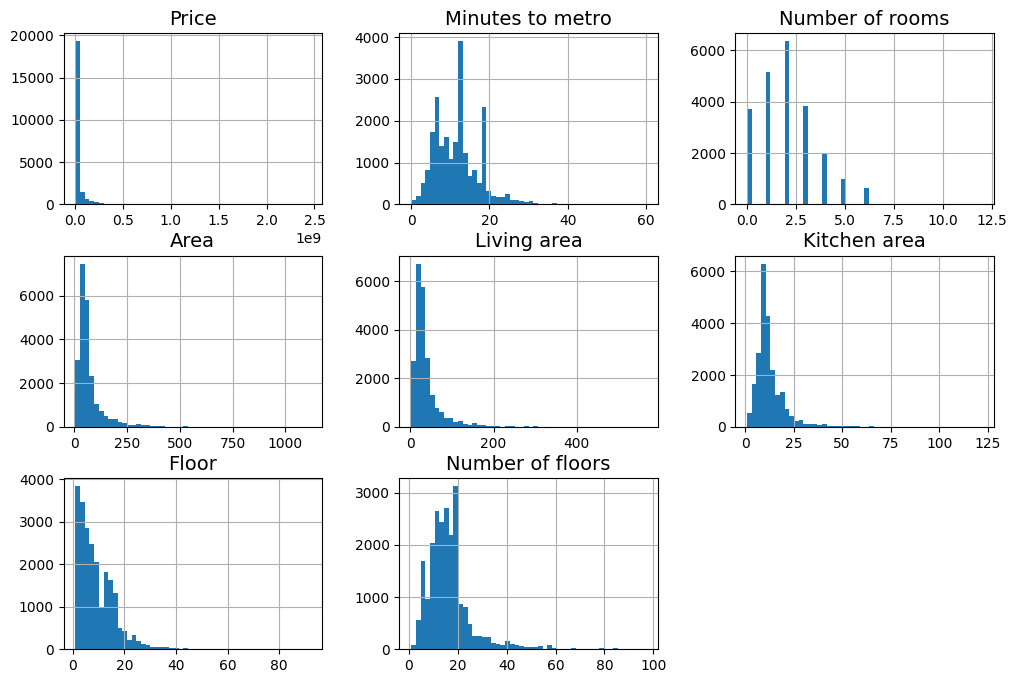

In [36]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

## Create test set

In [37]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [38]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

18141

In [39]:
len(test_set)

4535

In [62]:
housing["area_cat"] = pd.cut(housing["Area"],
                               bins=[0., 50., 100., 250., 600., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["area_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [65]:
strat_train_set, strat_test_set = strat_splits[0]

# Discover and Visualize the Data to Gain Insights

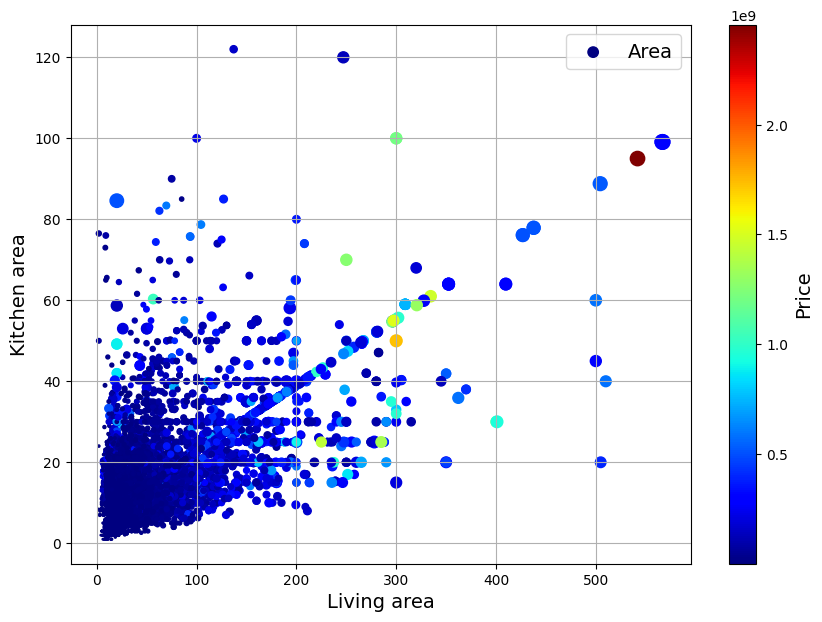

In [47]:
housing.plot(kind="scatter", x="Living area", y="Kitchen area", grid=True, s = housing["Area"]/10, label = "Area",
             c="Price", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

## Looking for Correlations

In [48]:
corr_matrix = housing.corr(numeric_only=True)

In [49]:
corr_matrix["Price"].sort_values(ascending=False)

Price               1.000000
Area                0.794226
Living area         0.709296
Kitchen area        0.582940
Number of rooms     0.490820
Floor               0.019080
Number of floors   -0.022134
Minutes to metro   -0.105382
Name: Price, dtype: float64

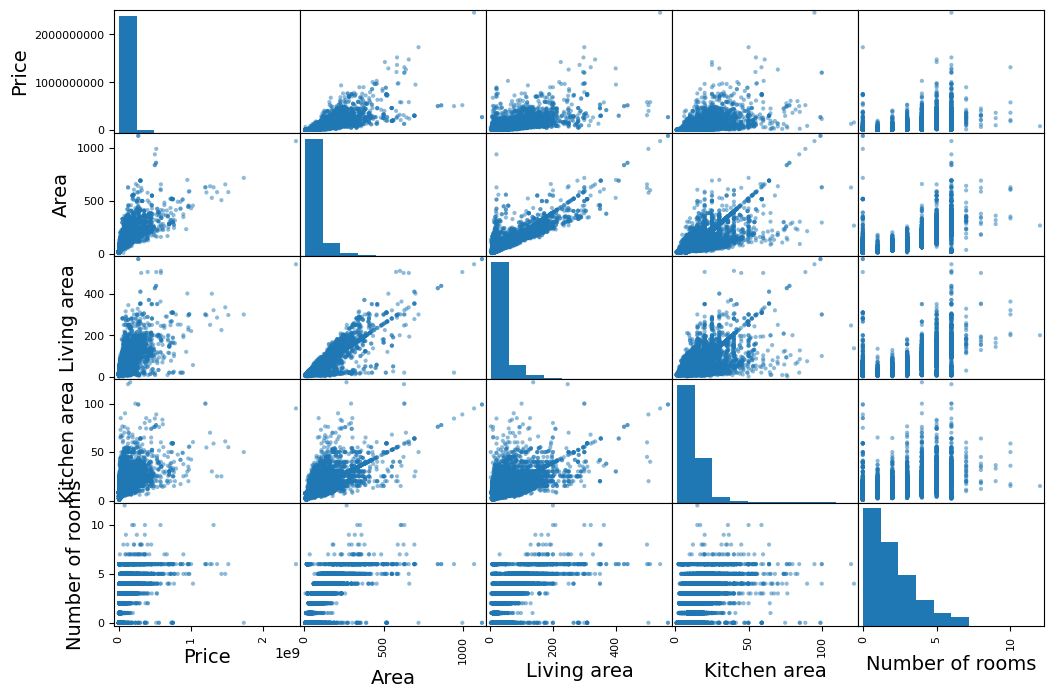

In [51]:
from pandas.plotting import scatter_matrix

attributes = ["Price", "Area", "Living area", "Kitchen area",
              "Number of rooms"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

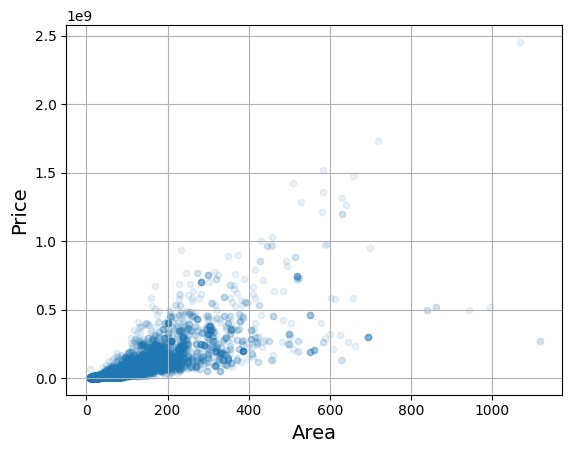

In [53]:
housing.plot(kind="scatter", x="Area", y="Price",
             alpha=0.1, grid=True)
plt.show()

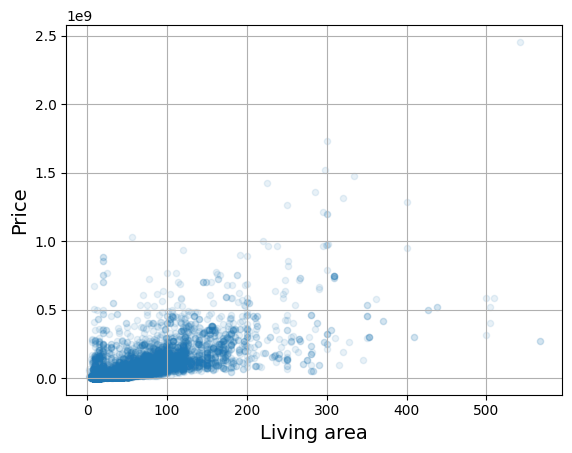

In [54]:
housing.plot(kind="scatter", x="Living area", y="Price",
             alpha=0.1, grid=True)
plt.show()

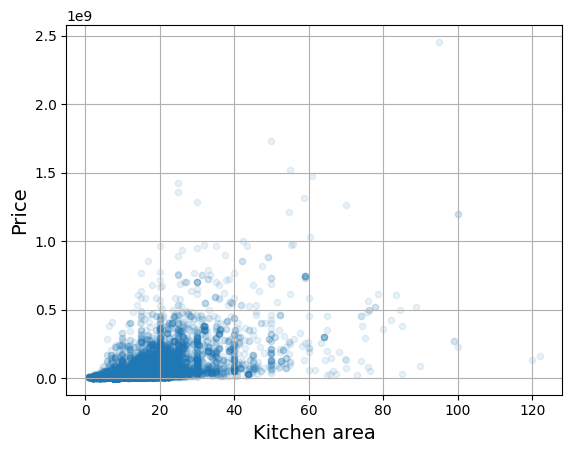

In [55]:
housing.plot(kind="scatter", x="Kitchen area", y="Price",
             alpha=0.1, grid=True)
plt.show()

As you can see the "Area" attribute has a strong correlation with the price.

## Experimenting with Attribute Combinations

In [58]:
housing["rooms_per_area"] = housing["Number of rooms"] / housing["Area"]
housing["living_area_ratio"] = housing["Living area"] / housing["Area"]
housing["kitchen_area_ration"] = housing["Kitchen area"] / housing["Area"]
housing["kitchen_living_ration"] = housing["Kitchen area"] / housing["Living area"]

In [59]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["Price"].sort_values(ascending=False)

Price                    1.000000
Area                     0.794226
Living area              0.709296
Kitchen area             0.582940
Number of rooms          0.490820
Floor                    0.019080
Number of floors        -0.022134
living_area_ratio       -0.068194
kitchen_living_ration   -0.073542
rooms_per_area          -0.085184
Minutes to metro        -0.105382
kitchen_area_ration     -0.283841
Name: Price, dtype: float64

The kitchen_area_ratio is in a relative strong negative correlation with the house price.

# Prepare the Data for Machine Learning Algorithms

In [66]:
from sklearn.model_selection import StratifiedShuffleSplit

housing = strat_train_set.drop("Price", axis=1)
housing_labels = strat_train_set["Price"].copy()

## Data Cleaning

In [67]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,rooms_per_area,living_area_ratio,kitchen_area_ration,kitchen_living_ration,area_cat


The data does not contain any missing values, but this is for practice.

In [72]:
housing_option1 = housing.copy()

housing_option1.dropna(subset=["Floor"], inplace=True)
housing_option1.dropna(subset=["Number of floors"], inplace=True)
housing_option1.dropna(subset=["living_area_ratio"], inplace=True)
housing_option1.dropna(subset=["kitchen_living_ration"], inplace=True)
housing_option1.dropna(subset=["rooms_per_area"], inplace=True)

housing_option1.loc[null_rows_idx].head()

,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,rooms_per_area,living_area_ratio,kitchen_area_ration,kitchen_living_ration,area_cat


The "Floor" attribute is in a really weak correlation with the price, so we drop it. We also drop a another few attributes.

In [73]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Also practice, if there were missing values we would replace with the median.

In [74]:
housing_num = housing.select_dtypes(include=[np.number])

In [75]:
imputer.fit(housing_num)

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [76]:
imputer.statistics_

array([1.10000000e+01, 2.00000000e+00, 5.33000000e+01, 2.85000000e+01,
       1.07000000e+01, 7.00000000e+00, 1.60000000e+01, 2.94117647e-02,
       5.45454545e-01, 1.96078431e-01, 3.70996238e-01])

In [77]:
housing_num.median().values

array([1.10000000e+01, 2.00000000e+00, 5.33000000e+01, 2.85000000e+01,
       1.07000000e+01, 7.00000000e+00, 1.60000000e+01, 2.94117647e-02,
       5.45454545e-01, 1.96078431e-01, 3.70996238e-01])

In [78]:
X = imputer.transform(housing_num)

In [79]:
imputer.feature_names_in_

array(['Minutes to metro', 'Number of rooms', 'Area', 'Living area',
       'Kitchen area', 'Floor', 'Number of floors', 'rooms_per_area',
       'living_area_ratio', 'kitchen_area_ration',
       'kitchen_living_ration'], dtype=object)

In [80]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [81]:
housing_tr.loc[null_rows_idx].head()

,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,rooms_per_area,living_area_ratio,kitchen_area_ration,kitchen_living_ration


## Handling Text and Categorical Attributes

In [82]:
housing_cat = housing[["Renovation"]]
housing_cat.head(8)

,Renovation
2903,Without renovation
18877,Cosmetic
1033,Cosmetic
752,European-style renovation
9842,European-style renovation
8610,Designer
3321,Designer
1382,Without renovation


In [83]:
housing_cat = housing[["Metro station"]]
housing_cat.head(8)

,Metro station
2903,Сходненская
18877,Депо
1033,Опалиха
752,Третьяковская
9842,Рижская
8610,Краснопресненская
3321,Площадь Революции
1382,Белорусская


In [92]:
housing_cat = housing[["Apartment type"]]
housing_cat.head(10)

,Apartment type
2903,Secondary
18877,New building
1033,Secondary
752,Secondary
9842,Secondary
8610,Secondary
3321,Secondary
1382,Secondary
19815,New building
16128,New building


In [90]:
housing_cat = housing[["Region"]]
housing_cat.head(10)

,Region
2903,Moscow
18877,Moscow
1033,Moscow region
752,Moscow
9842,Moscow
8610,Moscow
3321,Moscow
1382,Moscow
19815,Moscow region
16128,Moscow region


In [98]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing[["Metro station"]])

In [99]:
housing_cat_encoded[:8]

array([[201.],
       [310.],
       [136.],
       [210.],
       [446.],
       [342.],
       [155.],
       [ 20.]])

In [100]:
ordinal_encoder.categories_

[array([' Авиамоторная', ' Автозаводская', ' Академическая',
        ' Александровский сад', ' Алексеевская', ' Алма-Атинская',
        ' Алтуфьево', ' Аминьевская', ' Андроновка', ' Аникеевка',
        ' Арбатская', ' Аэропорт', ' Аэропорт Внуково', ' Бабушкинская',
        ' Багратионовская', ' Балтийская', ' Баррикадная', ' Бауманская',
        ' Беговая', ' Беломорская', ' Белорусская', ' Бескудниково',
        ' Бибирево', ' Библиотека и Ленина', ' Боровицкая',
        ' Ботанический сад', ' Братиславская', ' Бульвар Адмирала Ушакова',
        ' Бульвар Дмитрия Донского', ' Бульвар Рокоссовского',
        ' Бунинская аллея', ' Бутырская', ' ВДНХ', ' Варшавская',
        ' Верхние Лихоборы', ' Верхние котлы', ' Владыкино', ' Внуково',
        ' Водный стадион', ' Войковская', ' Волгоградский проспект',
        ' Волжская', ' Волоколамская', ' Воробьёвы горы', ' Воронцовская',
        ' Выставочная', ' Выставочный центр', ' Выхино', ' Говорово',
        ' Гражданская', ' Давыдково',

I don't know what to do with these. They seem important, but I don't know how would they help to predict the price.

In [107]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[["Metro station"]]
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(18140, 533))

In [108]:
cat_encoder.categories_

[array([' Авиамоторная', ' Автозаводская', ' Академическая',
        ' Александровский сад', ' Алексеевская', ' Алма-Атинская',
        ' Алтуфьево', ' Аминьевская', ' Андроновка', ' Аникеевка',
        ' Арбатская', ' Аэропорт', ' Аэропорт Внуково', ' Бабушкинская',
        ' Багратионовская', ' Балтийская', ' Баррикадная', ' Бауманская',
        ' Беговая', ' Беломорская', ' Белорусская', ' Бескудниково',
        ' Бибирево', ' Библиотека и Ленина', ' Боровицкая',
        ' Ботанический сад', ' Братиславская', ' Бульвар Адмирала Ушакова',
        ' Бульвар Дмитрия Донского', ' Бульвар Рокоссовского',
        ' Бунинская аллея', ' Бутырская', ' ВДНХ', ' Варшавская',
        ' Верхние Лихоборы', ' Верхние котлы', ' Владыкино', ' Внуково',
        ' Водный стадион', ' Войковская', ' Волгоградский проспект',
        ' Волжская', ' Волоколамская', ' Воробьёвы горы', ' Воронцовская',
        ' Выставочная', ' Выставочный центр', ' Выхино', ' Говорово',
        ' Гражданская', ' Давыдково',

## Feature Scaling